In [39]:
#importing librariies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler

In [40]:
# importing dataset
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [42]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [43]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_22888\2076176373.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Species'], palette = 'Accent')


<Axes: xlabel='count', ylabel='Species'>

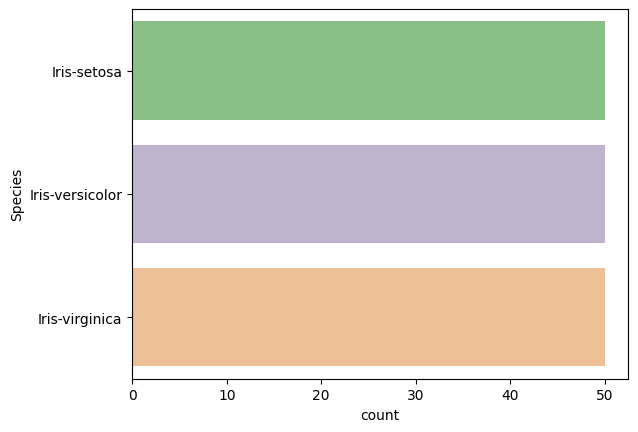

In [44]:
sns.countplot(df['Species'], palette = 'Accent')

<Axes: title={'center': 'Species'}>

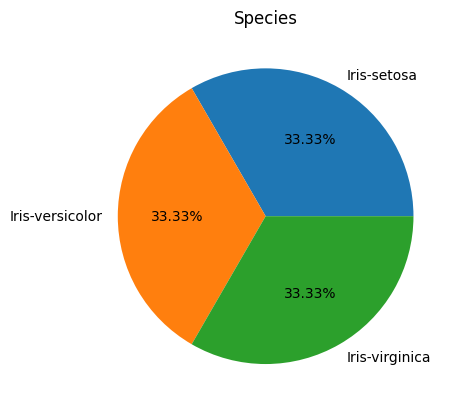

In [45]:
df['Species'].value_counts().plot(kind='pie',
                                  ylabel='',autopct='%0.2f%%',
                                  title='Species')

In [46]:
df['Species'].nunique()

setosa = df[df.Species == 'Iris-setosa']
versicolor = df[df.Species == 'Iris-versicolor']
virginica = df[df.Species == 'Iris-virginica']

In [47]:
setosa.describe()
 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.00000,50.000000,50.000000,50.00000
mean,25.50000,5.00600,3.418000,1.464000,0.24400
std,14.57738,0.35249,0.381024,0.173511,0.10721
min,1.00000,4.30000,2.300000,1.000000,0.10000
25%,13.25000,4.80000,3.125000,1.400000,0.20000
50%,25.50000,5.00000,3.400000,1.500000,0.20000
75%,37.75000,5.20000,3.675000,1.575000,0.30000
max,50.00000,5.80000,4.400000,1.900000,0.60000


In [48]:
versicolor.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,75.50000,5.936000,2.770000,4.260000,1.326000
std,14.57738,0.516171,0.313798,0.469911,0.197753
min,51.00000,4.900000,2.000000,3.000000,1.000000
25%,63.25000,5.600000,2.525000,4.000000,1.200000
50%,75.50000,5.900000,2.800000,4.350000,1.300000
75%,87.75000,6.300000,3.000000,4.600000,1.500000
max,100.00000,7.000000,3.400000,5.100000,1.800000


In [49]:
virginica.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.00000,50.000000,50.000000,50.00000
mean,125.50000,6.58800,2.974000,5.552000,2.02600
std,14.57738,0.63588,0.322497,0.551895,0.27465
min,101.00000,4.90000,2.200000,4.500000,1.40000
25%,113.25000,6.22500,2.800000,5.100000,1.80000
50%,125.50000,6.50000,3.000000,5.550000,2.00000
75%,137.75000,6.90000,3.175000,5.875000,2.30000
max,150.00000,7.90000,3.800000,6.900000,2.50000


<Axes: xlabel='Species', ylabel='SepalLengthCm'>

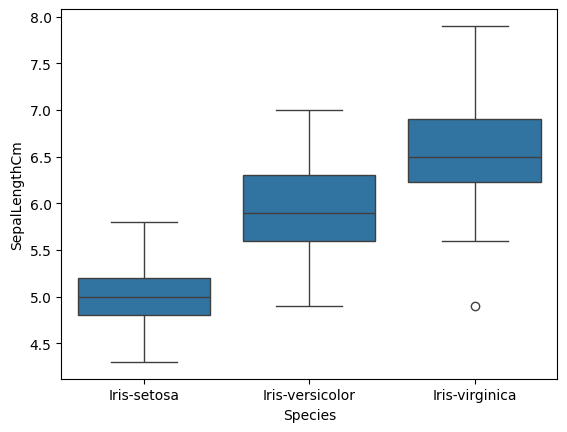

In [50]:
sns.boxplot(x = 'Species', y = 'SepalLengthCm', data = df)

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

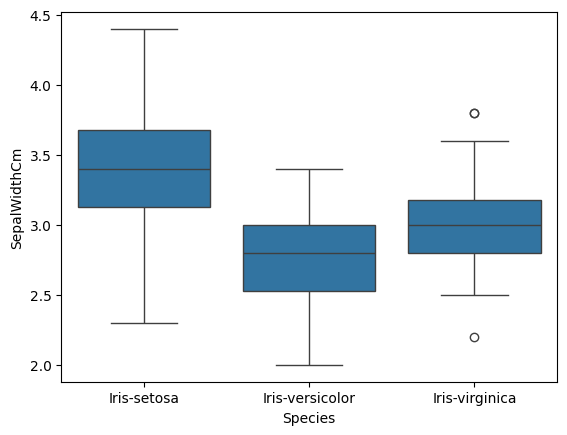

In [51]:
sns.boxplot(x = 'Species', y = 'SepalWidthCm', data = df)

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

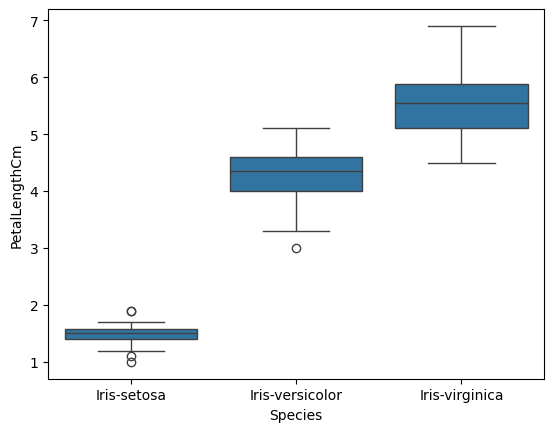

In [52]:
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = df)

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

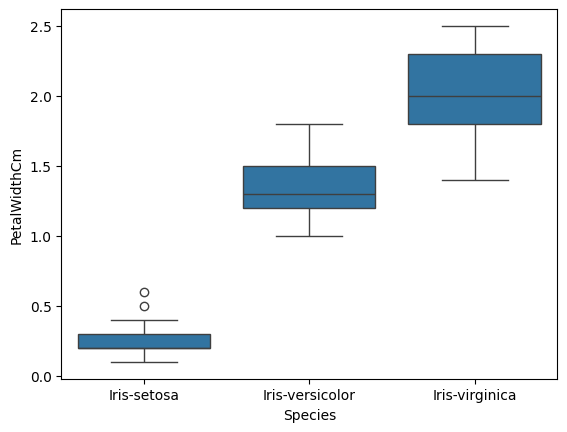

In [53]:
sns.boxplot(x = 'Species', y = 'PetalWidthCm', data = df)

<Axes: >

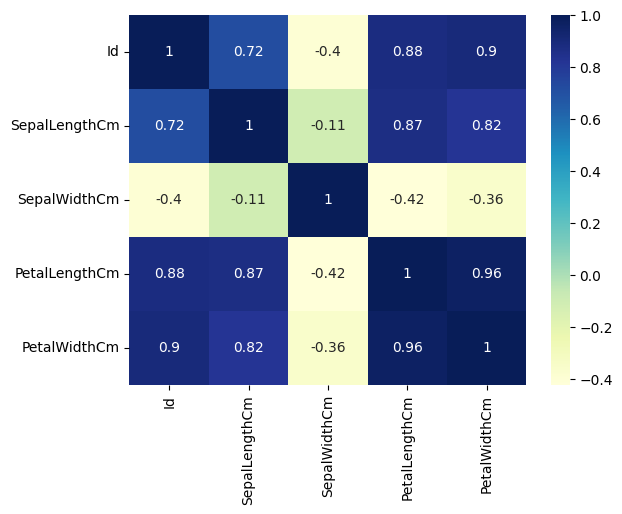

In [54]:
sns.heatmap(df.iloc[:,:-1].corr(), annot = True, cmap = 'YlGnBu')

<Axes: >

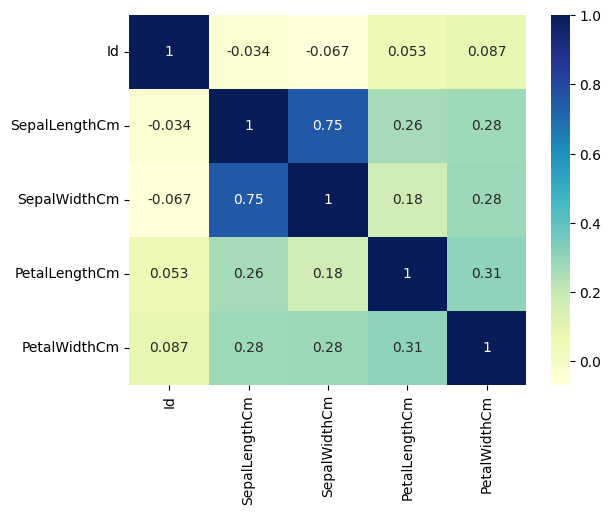

In [55]:
sns.heatmap(setosa.iloc[:,:-1].corr(), annot = True, cmap = 'YlGnBu')

<Axes: >

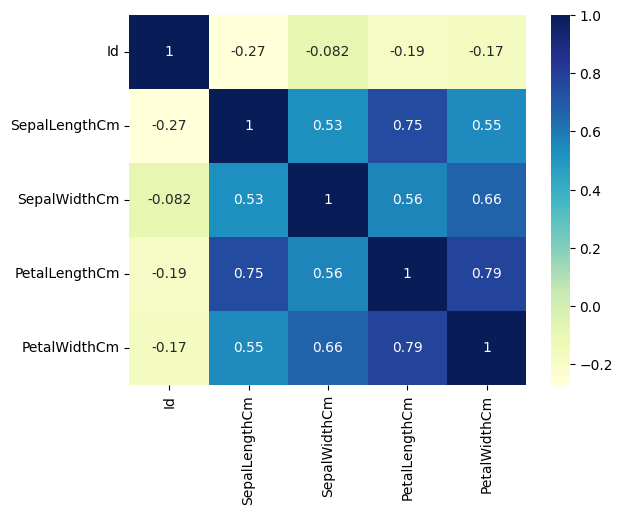

In [56]:
sns.heatmap(versicolor.iloc[:,:-1].corr(), annot = True, cmap = 'YlGnBu')

<Axes: >

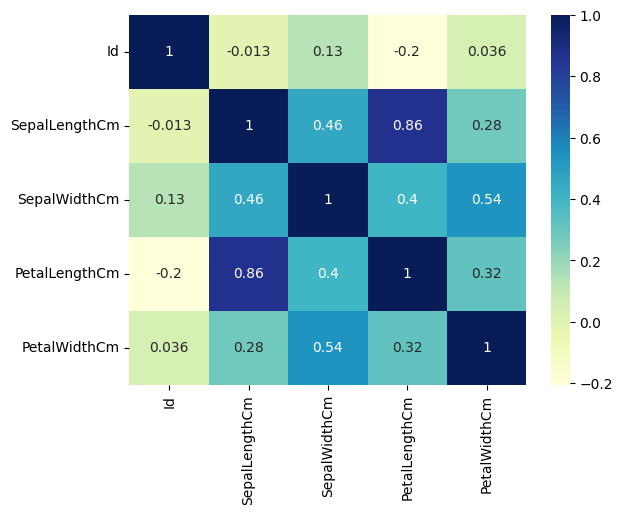

In [57]:
sns.heatmap(virginica.iloc[:,:-1].corr(), annot = True, cmap = 'YlGnBu')

In [58]:
def encode_species(s):
    if s == 'Iris-setosa':
        return 0
    elif s == 'Iris-versicolor':
        return 1
    else :  #Iris-virginica
        return 2
    
def decode_species(s):
    if s == 0:
        return 'Iris-setosa'
    elif s == 1:
        return 'Iris-versicolor'
    else : #s == 2
        return 'Iris-virginica'
df['Species'] = df['Species'].apply(lambda x : encode_species(x))

#converting datatype to integer
df['Species'] = df['Species'].astype('int32')

In [59]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [60]:
df.value_counts('Species')

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [61]:
x = df.drop(['Id','Species'], axis = 1).values
y = df.iloc[:,-1].values

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,
                                                    random_state= 42,stratify = y )

In [63]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)


LogisticRegression()

In [64]:
logistic_regression_predictions = logistic_regression.predict(x_test)

ACCURACY : 0.9473684210526315
CLASSIFICATION REPORT : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      0.92      0.92        13
           2       0.92      0.92      0.92        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



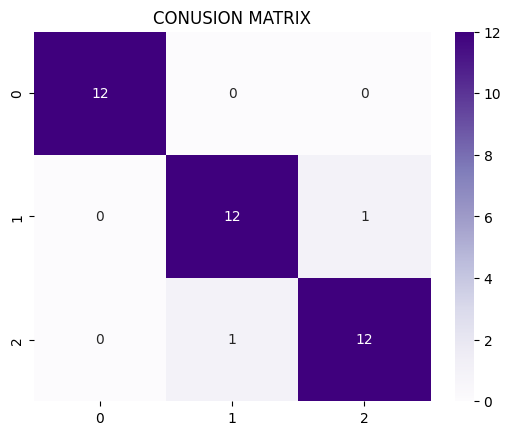

In [65]:
def get_report(actual, predicted):

    print(f"ACCURACY : {accuracy_score(actual, predicted)}")

    print(f"CLASSIFICATION REPORT : \n{classification_report(actual, predicted)}")

    conf_mat  = confusion_matrix(actual, predicted)

    sns.heatmap(conf_mat, annot = True, cmap = 'Purples')
    plt.title('CONUSION MATRIX')
    
get_report(y_test, logistic_regression_predictions)

In [66]:
k_nearest = KNeighborsClassifier()
k_nearest.fit(x_train, y_train)

KNeighborsClassifier()

ACCURACY : 0.9736842105263158
CLASSIFICATION REPORT : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



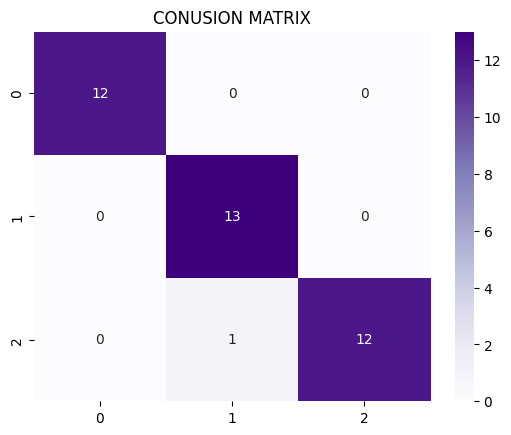

In [67]:
k_nearest_predictions = k_nearest.predict(x_test)
get_report(y_test, k_nearest_predictions)